### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [ ]:
# сделайте разделение изначального набора данных в этой ячейке

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

sns.set_style("white")
sns.set_theme(style="whitegrid")

# Устанавливаем настройки отображения Pandas
pd.set_option('display.max_columns', None)  # Показывать все колонки
pd.set_option('display.width', None)        # Автоматически подбирать ширину


ASSETS_DIR = "assets"
FS_ASSETS_DIR = 'assets_fs'
HYP_ASSETS_DIR = 'assets_hyp'

os.makedirs(ASSETS_DIR, exist_ok=True)
os.makedirs(FS_ASSETS_DIR, exist_ok=True)
os.makedirs(HYP_ASSETS_DIR, exist_ok=True)

SEED = 42

In [2]:
df = pd.read_csv('initial_data.csv')

X = df.drop('price',axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (84089, 15)
Размер тестовой выборки: (21023, 15)


#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


#### 2.1 Загрузка данных

In [3]:
df = pd.read_csv('initial_data.csv')

In [4]:
df

index  build_year  building_type_int   latitude  longitude   
0            0        1999                  4  55.647701  37.761356  \
1            1        1995                  4  55.687134  37.863522   
2            2        2015                  4  55.697556  37.924061   
3            3        1997                  4  55.834301  37.352211   
4            4        1974                  4  55.815945  37.701008   
...        ...         ...                ...        ...        ...   
105107  105107        1984                  4  55.761795  37.410034   
105108  105108        2004                  4  55.853230  37.646873   
105109  105109        1969                  4  55.626068  37.608238   
105110  105110        2008                  4  55.872646  37.634228   
105111  105111        1971                  4  55.740402  37.834579   

        ceiling_height  flats_count  floors_total  has_elevator  floor   
0                 2.64          460            14          True      9  \
1                 2.64          186             9          True      4   
2                 2.74          320            17          True      5   
3                 2.64          473            17          True     10   
4                 2.64          143             9          True      7   
...                ...          ...           ...           ...    ...   
105107            2.64          474            17          True     13   
105108            2.74          513            17          True      9   
105109            2.50          282             9          True      3   
105110            2.74          128            17          True      9   
105111            2.64          428             9          True      8   

        kitchen_area  living_area  rooms  is_apartment  total_area     price  
0               10.3    46.599998      3         False   80.000000  13500000  
1               10.0    17.000000      1         False   45.000000   5720000  
2                8.0    19.000000      1         False   37.799999   6000000  
3                9.2    30.799999      2         False   55.000000   8750000  
4                7.0    33.000000      2         False   48.000000   8500000  
...              ...          ...    ...           ...         ...       ...  
105107          10.0    33.000000      2         False   57.700001  19300000  
105108           7.0    18.000000      1         False   38.000000   9200000  
105109           6.7    29.000000      2         False   45.000000  11300000  
105110          12.9    33.900002      2         False   64.000000  14800000  
105111           6.0    42.000000      3         False   64.000000  10800000  

[105112 rows x 16 columns]

#### 2.2. Общий обзор датасета

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105112 entries, 0 to 105111
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              105112 non-null  int64  
 1   build_year         105112 non-null  int64  
 2   building_type_int  105112 non-null  int64  
 3   latitude           105112 non-null  float64
 4   longitude          105112 non-null  float64
 5   ceiling_height     105112 non-null  float64
 6   flats_count        105112 non-null  int64  
 7   floors_total       105112 non-null  int64  
 8   has_elevator       105112 non-null  bool   
 9   floor              105112 non-null  int64  
 10  kitchen_area       105112 non-null  float64
 11  living_area        105112 non-null  float64
 12  rooms              105112 non-null  int64  
 13  is_apartment       105112 non-null  bool   
 14  total_area         105112 non-null  float64
 15  price              105112 non-null  int64  
dtypes:

df['build_year'] = df['build_year'].astype('category')
df['has_elevator'] = df['has_elevator'].astype('category')
df['is_apartment'] = df['is_apartment'].astype('category')

In [6]:
df.nunique()

index                105112
build_year              115
building_type_int         6
latitude              14392
longitude             14034
ceiling_height           35
flats_count             589
floors_total             29
has_elevator              2
floor                    28
kitchen_area            542
living_area            1362
rooms                     5
is_apartment              2
total_area             1785
price                  4017
dtype: int64

In [7]:
df.describe()

index     build_year  building_type_int       latitude   
count  105112.000000  105112.000000      105112.000000  105112.000000  \
mean    52555.500000    1984.442090           3.516754      55.727969   
std     30343.365085      19.572874           1.412276       0.103246   
min         0.000000    1902.000000           0.000000      55.427238   
25%     26277.750000    1969.000000           3.000000      55.648724   
50%     52555.500000    1980.000000           4.000000      55.717361   
75%     78833.250000    2002.000000           4.000000      55.813507   
max    105111.000000    2023.000000           6.000000      56.011032   

           longitude  ceiling_height    flats_count   floors_total   
count  105112.000000   105112.000000  105112.000000  105112.000000  \
mean       37.603565        2.688617     223.832360      13.177135   
std         0.149194        0.131056     134.100335       5.255650   
min        37.190639        2.450000       1.000000       1.000000   
25%        37.495232        2.640000     111.000000       9.000000   
50%        37.591217        2.640000     193.000000      12.000000   
75%        37.721893        2.740000     301.000000      17.000000   
max        37.946411        3.000000     640.000000      29.000000   

               floor   kitchen_area    living_area          rooms   
count  105112.000000  105112.000000  105112.000000  105112.000000  \
mean        6.957598       8.126170      27.548942       1.945839   
std         4.865707       3.009933      14.464359       0.816547   
min         1.000000       0.000000       0.000000       1.000000   
25%         3.000000       6.000000      19.000000       1.000000   
50%         6.000000       8.460000      28.400000       2.000000   
75%        10.000000      10.000000      36.000000       3.000000   
max        29.000000      16.300000      74.000000       5.000000   

          total_area         price  
count  105112.000000  1.051120e+05  
mean       51.720546  1.184065e+07  
std        16.309861  4.538241e+06  
min        11.000000  1.500000e+03  
25%        38.400002  8.500000e+06  
50%        48.400002  1.090000e+07  
75%        60.599998  1.400000e+07  
max       120.300003  2.860000e+07

***Вывод:***  
- В датасете 15 столбцов и 105112 записей.
- Данные были предобработаны в проекте первого спринта, пропущенных значений нет.

#### 2.3 Анализ признаков для модели

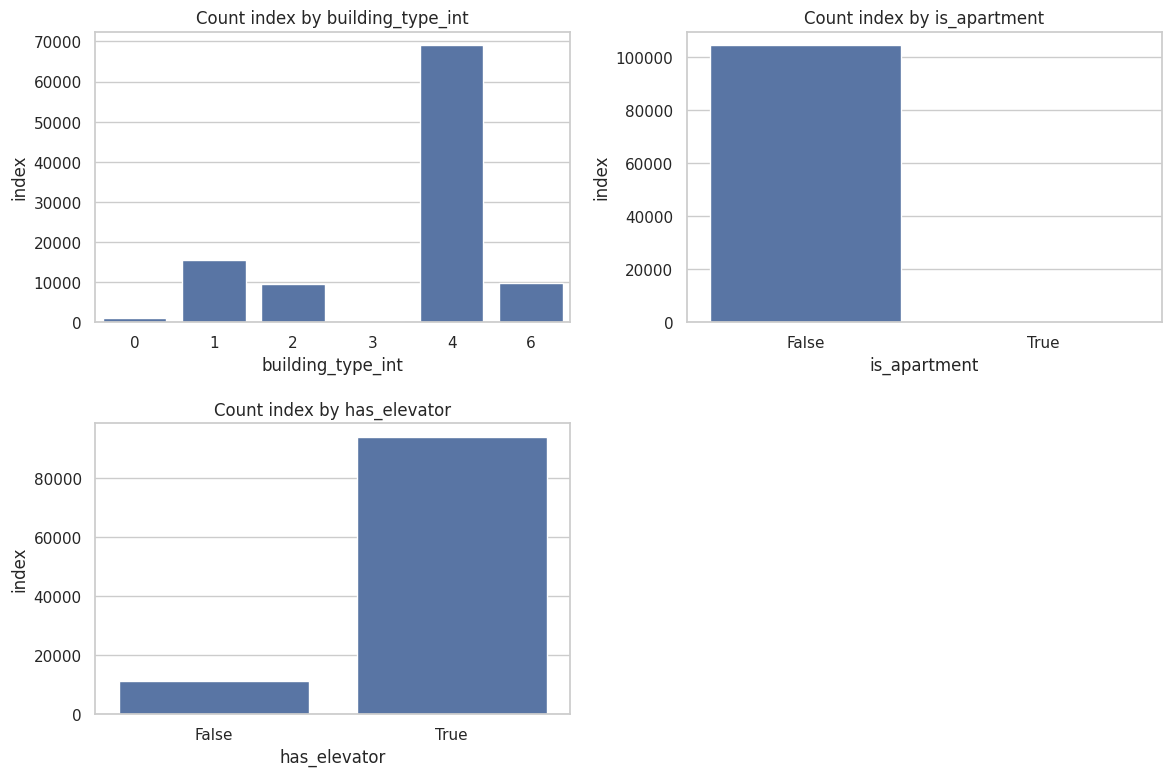

In [8]:
# Категориальные признаки

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12.5, 8.5)
fig.tight_layout(pad=4)

# График 1
x = "building_type_int"
y = "index"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[0, 0])
axs[0, 0].set_title(f'Count {y} by {x}')

# График 2
x = "is_apartment"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[0, 1])
axs[0, 1].set_title(f'Count {y} by {x}')

# График 3
x = "has_elevator"
agg_df = df.groupby(x)[y].nunique().reset_index()
sns.barplot(data=agg_df, x=x, y=y, ax=axs[1, 0])
axs[1, 0].set_title(f'Count {y} by {x}')

# Удаляем 4-й график
fig.delaxes(axs[1, 1])

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'cat_features'))

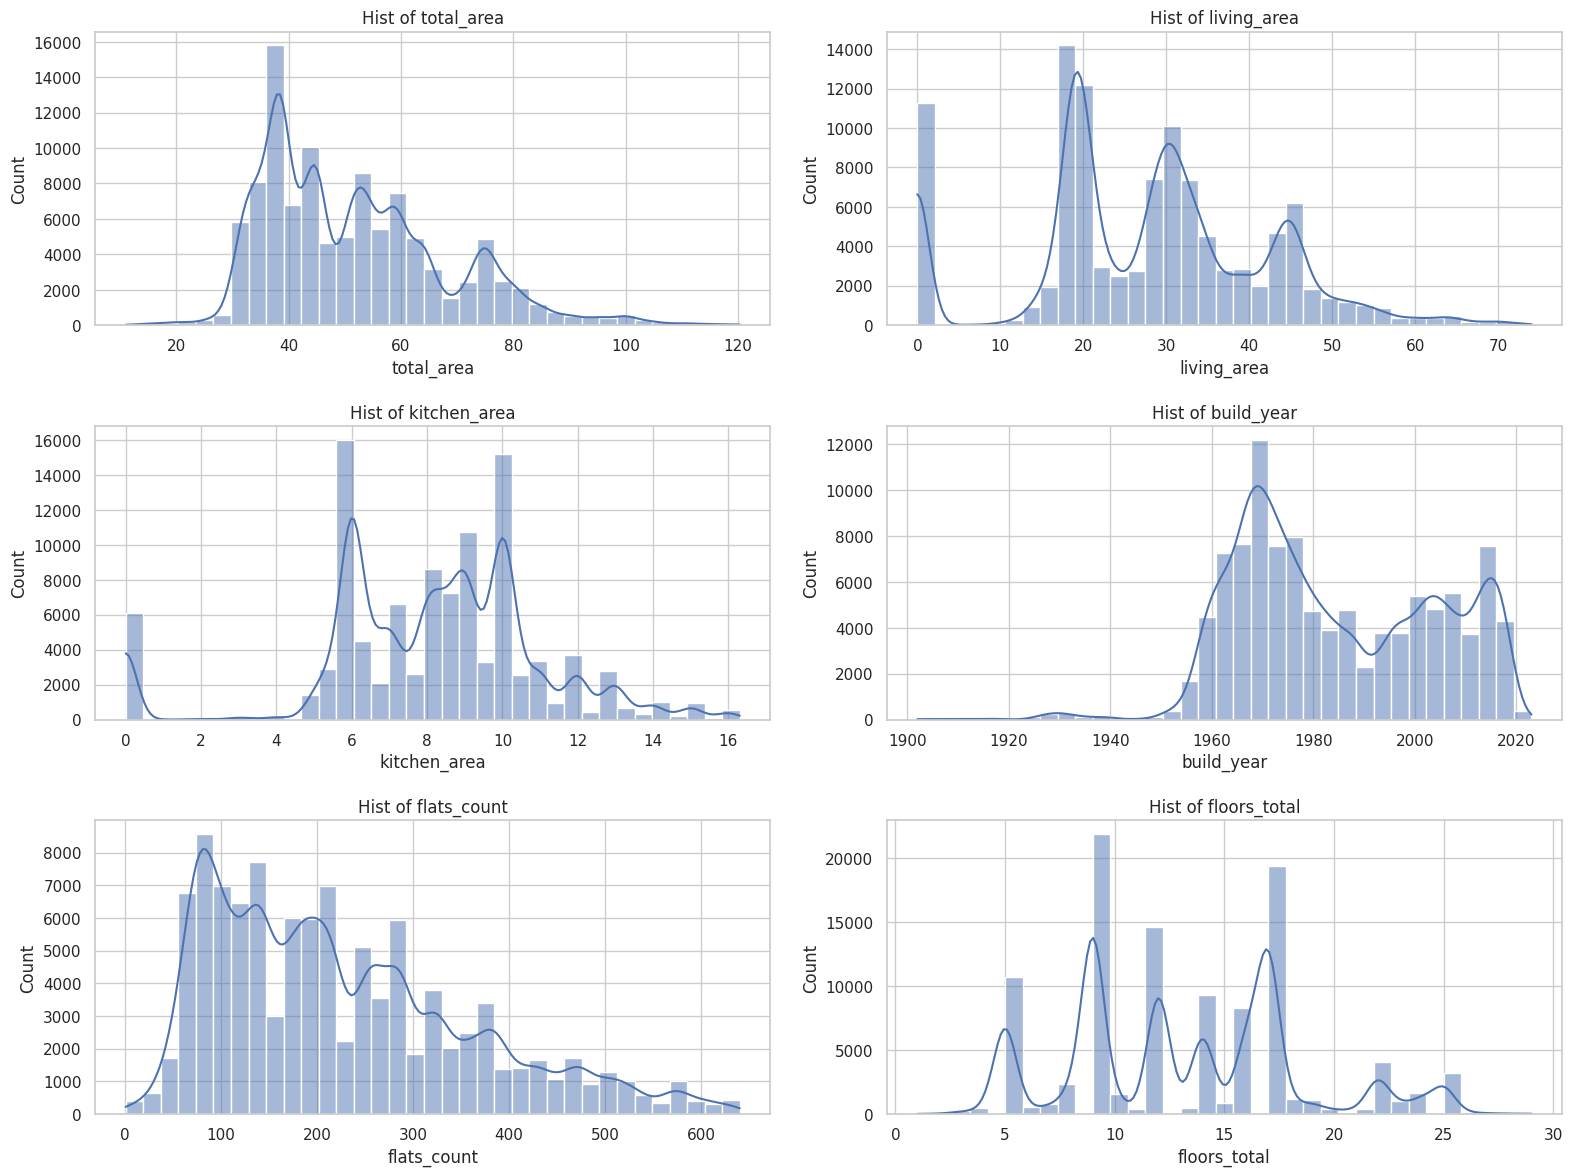

In [9]:
# Числовые признаки 1

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=4)

# График 1
x='total_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[0, 0])
axs[0, 0].set_title(f'Hist of {x}')

# График 2
x='living_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[0, 1])
axs[0, 1].set_title(f'Hist of {x}')

# График 3
x='kitchen_area'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[1, 0])
axs[1, 0].set_title(f'Hist of {x}')

# График 4
x='build_year'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[1, 1])
axs[1, 1].set_title(f'Hist of {x}')

# График 5
x='flats_count'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[2, 0])
axs[2, 0].set_title(f'Hist of {x}')

# График 6
x='floors_total'
sns.histplot(data=df, x=x, kde=True, bins=35, ax=axs[2, 1])
axs[2, 1].set_title(f'Hist of {x}')

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'num_features'))

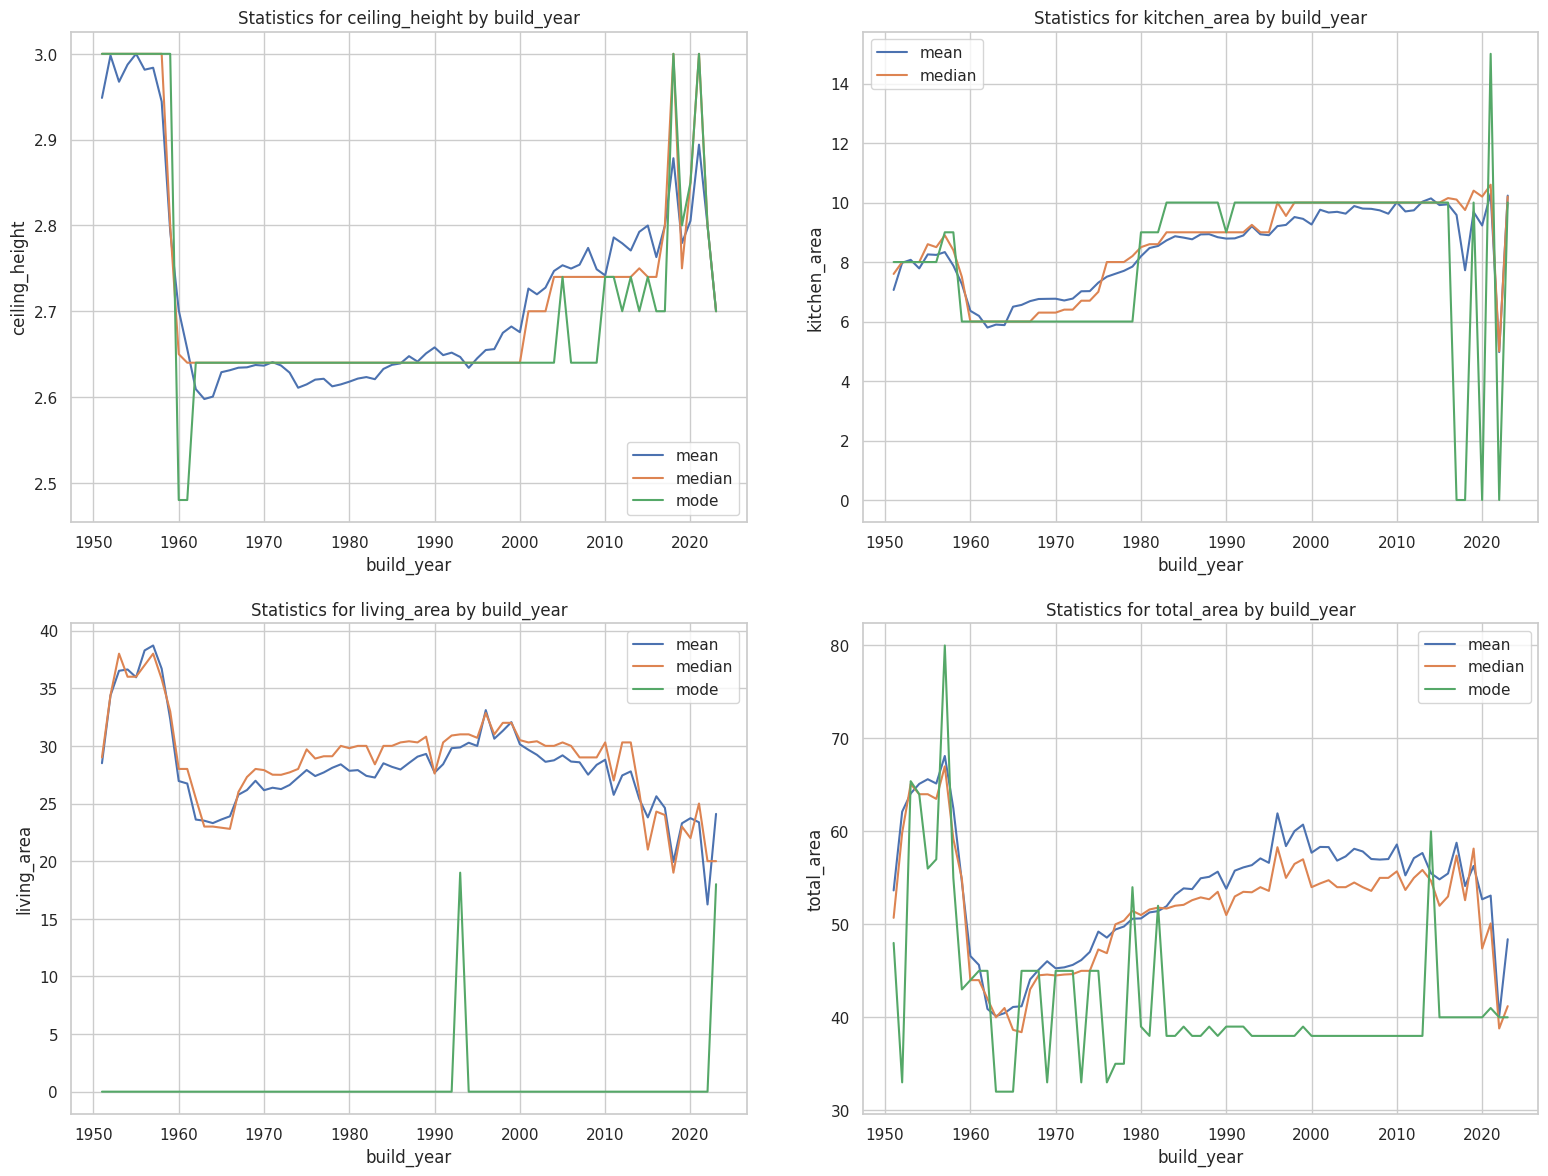

In [10]:
#  Числовые признаки по годам

x = "build_year"

num_columns = ['ceiling_height', 
               'kitchen_area', 
               'living_area', 
               'total_area']

stats = ["mean", "median", lambda x: x.mode().iloc[0]]

ceiling_height_agg = df[[x] + [num_columns[0]]].groupby([x]).agg(stats).reset_index()
ceiling_height_agg.columns = ceiling_height_agg.columns.droplevel()
ceiling_height_agg.columns = [x, "ceiling_height_mean", "ceiling_height_median", "ceiling_height_mode"]


kitchen_area_agg = df[[x] + [num_columns[1]]].groupby([x]).agg(stats).reset_index()
kitchen_area_agg.columns = kitchen_area_agg.columns.droplevel()
kitchen_area_agg.columns = [x, "kitchen_area_mean", "kitchen_area_median", "kitchen_area_mode"]

living_area_agg = df[[x] + [num_columns[2]]].groupby([x]).agg(stats).reset_index()
living_area_agg.columns = living_area_agg.columns.droplevel()
living_area_agg.columns = [x, "living_area_mean", "living_area_median", "living_area_mode"]

total_area_agg = df[[x] + [num_columns[3]]].groupby([x]).agg(stats).reset_index()
total_area_agg.columns = total_area_agg.columns.droplevel()
total_area_agg.columns = [x, "total_area_mean", "total_area_median", "total_area_mode"]

ceiling_height_agg = ceiling_height_agg[ceiling_height_agg["build_year"] > 1950].sort_values("build_year")
kitchen_area_agg = kitchen_area_agg[kitchen_area_agg["build_year"] > 1950].sort_values("build_year")
living_area_agg = living_area_agg[living_area_agg["build_year"] > 1950].sort_values("build_year")
total_area_agg = total_area_agg[total_area_agg["build_year"] > 1950].sort_values("build_year")

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(16.5, 12.5, forward=True)
fig.tight_layout(pad=4)

# Графики для ceiling_height
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_mean', label='mean')
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_median', label='median')
sns.lineplot(ceiling_height_agg, ax=axs[0,0], x=x, y='ceiling_height_mode', label='mode')
axs[0,0].set_title(f"Statistics for {num_columns[0]} by {x}")
axs[0,0].set_ylabel('ceiling_height', fontsize=12)
axs[0,0].legend()

# Графики для kitchen_area
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_mean', label='mean')
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_median', label='median')
sns.lineplot(kitchen_area_agg, ax=axs[0,1], x=x, y='kitchen_area_mode')
axs[0,1].set_title(f"Statistics for {num_columns[1]} by {x}")
axs[0,1].set_ylabel('kitchen_area', fontsize=12)
axs[0,1].legend()

# Графики для living_area
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_mean', label='mean')
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_median', label='median')
sns.lineplot(living_area_agg, ax=axs[1,0], x=x, y='living_area_mode', label='mode')
axs[1,0].set_title(f"Statistics for {num_columns[2]} by {x}")
axs[1,0].set_ylabel('living_area', fontsize=12)
axs[1,0].legend()

# Графики для total_area
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_mean', label='mean')
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_median', label='median')
sns.lineplot(total_area_agg, ax=axs[1,1], x=x, y='total_area_mode', label='mode')
axs[1,1].set_title(f"Statistics for {num_columns[3]} by {x}")
axs[1,1].set_ylabel('total_area', fontsize=12)
axs[1,1].legend()

# сохранение графиков в файл
plt.savefig(os.path.join(ASSETS_DIR, 'statistics_by_year'))

#### 2.4 Анализ целевой переменной

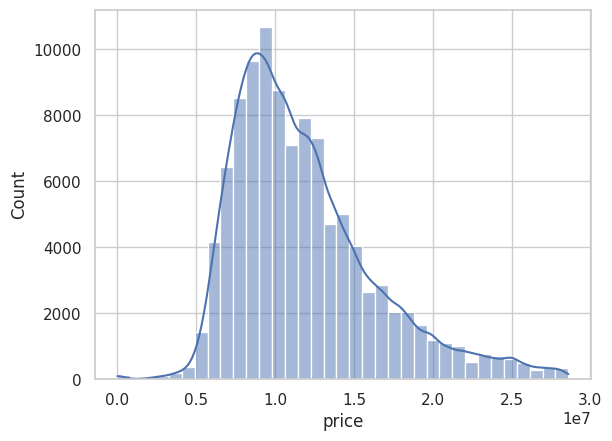

In [11]:
# График price

x='price'
sns.histplot(data=df, x=x, kde=True, bins=35)

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'target'))

In [12]:
df['price'].describe()

count    1.051120e+05
mean     1.184065e+07
std      4.538241e+06
min      1.500000e+03
25%      8.500000e+06
50%      1.090000e+07
75%      1.400000e+07
max      2.860000e+07
Name: price, dtype: float64

#### 2.4 Анализ целевой переменной в зависимости от различных признаков

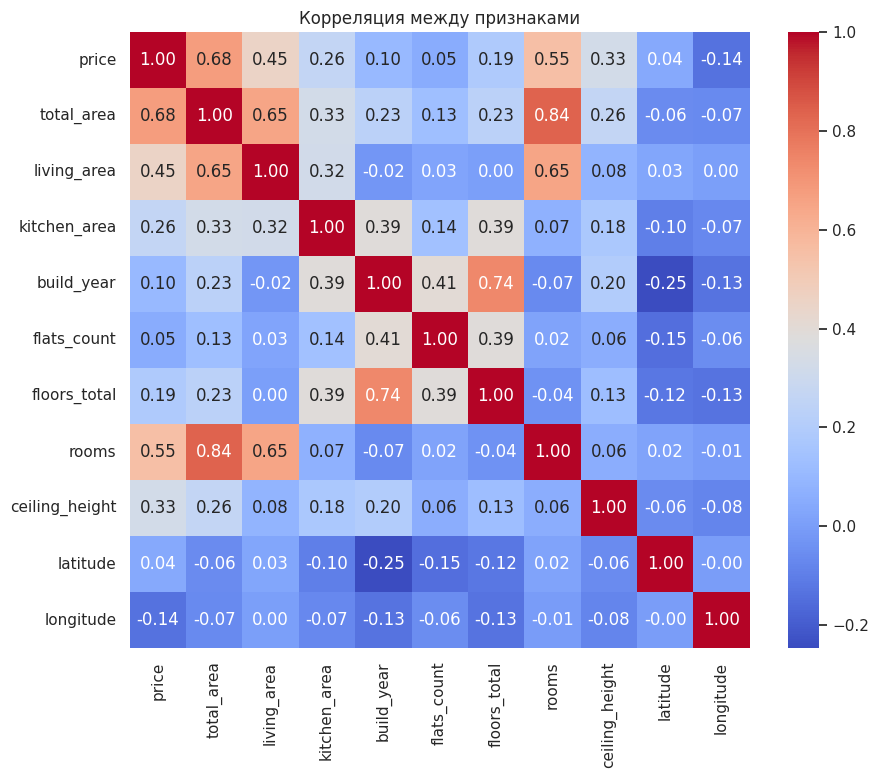

In [13]:
# Числовые признаки

num_cols = ['price','total_area','living_area','kitchen_area','build_year','flats_count','floors_total'
           ,'rooms','ceiling_height','latitude','longitude']

correlations_with_price = df[num_cols].corr()

# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_price, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между признаками')

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'corr_with_target'))


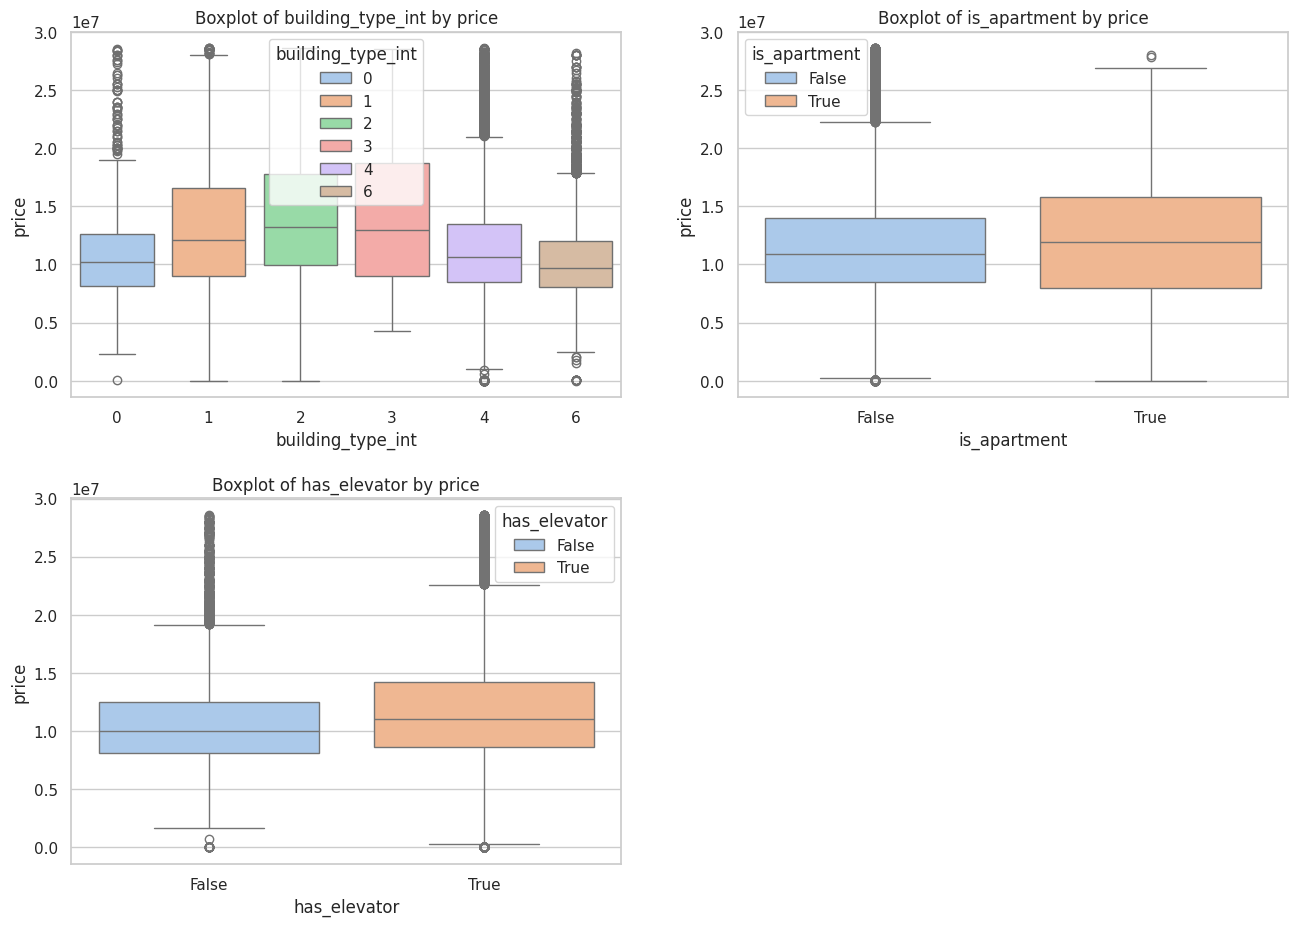

In [14]:
# Категориалные признаки

cat_and_bin_cols = ['is_apartment','has_elevator','building_type_int']

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(14, 10, forward=True)
fig.tight_layout(pad=4)
y = 'price'


x = 'building_type_int'
sns.boxplot(data=df, x=x, y=y, ax=axs[0, 0], hue=x, palette='pastel')
axs[0, 0].set_title(f'Boxplot of {x} by {y}')

x = 'is_apartment'
sns.boxplot(data=df, x=x, y=y, ax=axs[0, 1], hue=x, palette='pastel')
axs[0, 1].set_title(f'Boxplot of {x} by {y}')

x = 'has_elevator'
sns.boxplot(data=df, x=x, y=y, ax=axs[1, 0], hue=x, palette='pastel')
axs[1, 0].set_title(f'Boxplot of {x} by {y}')

fig.delaxes(axs[1, 1])

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'boxplot_cat_features_price'))

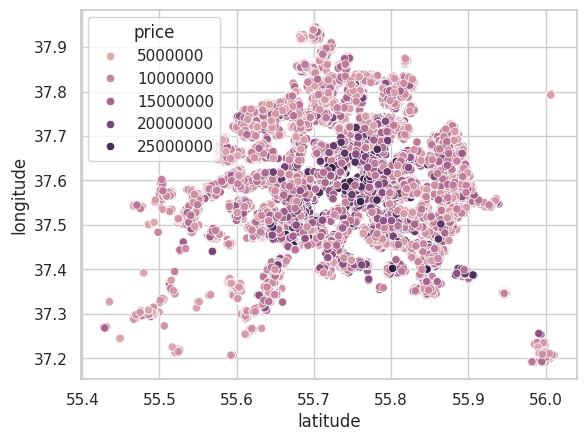

In [15]:
# График latitude, longitude от price
sns.scatterplot(data=df, x='latitude', y='longitude',hue='price')

# сохранение графика в файл
plt.savefig(os.path.join(ASSETS_DIR, 'geo_price'))

#### 2.5 Выводы после EDA

Данные были предобработаны в проекте первого спринта, проанализированы и  отчищены от выбросов. Пропущенных значений нет.  

***Вывод:***  
- По ряду категориальных и бинарных признаков виден дисбаланс например:`building_type_int`, `is_apartment`, `has_elevator`  
- Все числовые признаки несмотря на удаление выбросов имеют хвосты.  
- С годами растет высота потолков, но уменьшается площадь помещений.    
- Корреляционный анализ показывает что наиболее сильные признаки это признаки которые непосредственно касаются размеров площадей:  
    - `total_area` (0.68) — самая сильная связь. Чем больше общая площадь, тем выше цена (логично).
    - `rooms` (0.55) — количество комнат также сильно влияет на цену.  
    - `living_area` (0.45) — жилая площадь коррелирует с ценой, но слабее, чем общая площадь.  

    - `total_area` и `rooms` (0.84) — почти линейная зависимость. Это может означать, что количество комнат часто определяется общей площадью (риск мультиколлинеарности).
    - `build_year` и `floors_total` (0.74) — в новых домах обычно больше этажей.
    - `kitchen_area` слабо связана с `price` (0.26), но сильно с `build_year` (0.39) — возможно, в новых домах делают большие кухни.
    - `ceiling_height` (0.33) — высота потолков имеет умеренное влияни.  

    - Географические координаты (`latitude, longitude`) почти не влияют на цену (коэффициенты близки к 0). Возможно, данные недостаточно детализированы (например, нет привязки к районам).
    - `flats_count` (количество квартир в доме) и `floors_total` слабо связаны с ценой — цена зависит скорее от характеристик самой квартиры, чем от дома.  

- Геолокации объектов сгруппированы в одной области и судя по данным это Москва. На будущее: можно сформировать доп. признаки, такие как удаленность от центра и от метро.  
- ***Таргет наиболее "приближен" к нормальному распределению, но наблюдается правосторонняя асимметрия. На базовой модели был логорифмирован целевой признак и наблюдалось резкое улучшение метрик.***  


- Все графики для анализа сохранены в отельные файлы:  
    - `cat_features.png`  
    - `num_features.png`
    - `statistics_by_year.png`
    - `target.png`
    - `corr_with_target.png`
    - `boxplot_cat_features_price.png`
    - `geo_price.png`

#### 2.6 логирование артефактов в MLflow

In [16]:
markdown_content = '''Данные были предобработаны в проекте первого спринта, проанализированы и  отчищены от выбросов. Пропущенных значений нет.  

***Вывод:***  
- По ряду категориальных и бинарных признаков виден дисбаланс например:`building_type_int`, `is_apartment`, `has_elevator`  
- Все числовые признаки несмотря на удаление выбросов имеют хвосты.  
- С годами растет высота потолков, но уменьшается площадь помещений.    
- Корреляционный анализ показывает что наиболее сильные признаки это признаки которые непосредственно касаются размеров площадей:  
    - `total_area` (0.68) — самая сильная связь. Чем больше общая площадь, тем выше цена (логично).
    - `rooms` (0.55) — количество комнат также сильно влияет на цену.  
    - `living_area` (0.45) — жилая площадь коррелирует с ценой, но слабее, чем общая площадь.  

    - `total_area` и `rooms` (0.84) — почти линейная зависимость. Это может означать, что количество комнат часто определяется общей площадью (риск мультиколлинеарности).
    - `build_year` и `floors_total` (0.74) — в новых домах обычно больше этажей.
    - `kitchen_area` слабо связана с `price` (0.26), но сильно с `build_year` (0.39) — возможно, в новых домах делают большие кухни.
    - `ceiling_height` (0.33) — высота потолков имеет умеренное влияни.  

    - Географические координаты (`latitude, longitude`) почти не влияют на цену (коэффициенты близки к 0). Возможно, данные недостаточно детализированы (например, нет привязки к районам).
    - `flats_count` (количество квартир в доме) и `floors_total` слабо связаны с ценой — цена зависит скорее от характеристик самой квартиры, чем от дома.  

- Геолокации объектов сгруппированы в одной области и судя по данным это Москва. На будущее: можно сформировать доп. признаки, такие как удаленность от центра и от метро.  
- ***Таргет наиболее "приближен" к нормальному распределению, но наблюдается правосторонняя асимметрия. На базовой модели был логорифмирован целевой признак и наблюдалось резкое улучшение метрик.***  


- Все графики для анализа сохранены в отельные файлы:  
    - `cat_features.png`  
    - `num_features.png`
    - `statistics_by_year.png`
    - `target.png`
    - `corr_with_target.png`
    - `boxplot_cat_features_price.png`
    - `geo_price.png`
'''

markdown_file = f"{ASSETS_DIR}/conclusions_eda.md"
with open(markdown_file, "w") as f:
    f.write(markdown_content)

In [17]:
import os
import joblib
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "ozerge_PROJECT_SPRINT_2"
RUN_NAME = "EDA"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id
    notebook_path = "../model_improvement/project_template_sprint_2.ipynb"
    mlflow.log_artifact(notebook_path)

    mlflow.log_artifacts(ASSETS_DIR)

In [18]:
run = mlflow.get_run(run_id)

print("EXPERIMENT_NAME: ", EXPERIMENT_NAME)
print("experiment_id: ", experiment_id)
print("run_id: ", run_id)

EXPERIMENT_NAME:  ozerge_PROJECT_SPRINT_2
experiment_id:  31
run_id:  aac9b6208500448e987482b3df63fa03


#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


#### 3.1 ручная генерация признаков

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_validate
from category_encoders import CatBoostEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from sklearn.impute import SimpleImputer
from autofeat import AutoFeatRegressor

sns.set_style("white")
sns.set_theme(style="whitegrid")

pd.set_option('display.max_columns', 50)


ASSETS_DIR = "assets"
FS_ASSETS_DIR = 'assets_fs'
HYP_ASSETS_DIR = 'assets_hyp'

os.makedirs(ASSETS_DIR, exist_ok=True)
os.makedirs(FS_ASSETS_DIR, exist_ok=True)
os.makedirs(HYP_ASSETS_DIR, exist_ok=True)

SEED = 42

In [2]:
df = pd.read_csv('initial_data.csv')

data = df.copy()

# избавляемся от мультиколлинеарности формируя новый признак:
data['total_rooms_ratio'] = data['total_area'] / data['rooms']

data = data.drop(columns=['rooms'])

In [3]:
# добавляем новый признак расстояния до центра:

center_lat, center_long = 55.7520, 37.6175  # Координаты Кремля
data['distance_to_center'] = np.sqrt(
    (data['latitude'] - center_lat)**2 + 
    (data['longitude'] - center_long)**2
) 

In [4]:
data['ratio_living_area'] = data['living_area'] / data['total_area']

data['ratio_kitchen_area'] = data['kitchen_area'] / data['total_area']

data['mean_flats_area'] = data['total_area'] / data['flats_count']

In [5]:
X = data.drop(['index','price'],axis=1)

# Логарифмируем таргет
y = np.log1p(data['price'])


cat_cols = ['building_type_int']
bin_cols =  ['has_elevator', 'is_apartment']
X['building_type_int'] = X['building_type_int'].astype(str)

num_features = [col for col in X.columns if col not in cat_cols]
#cat_features = cat_index

features = cat_cols + num_features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (84089, 18)
Размер тестовой выборки: (21023, 18)


#### 3.2 автоматическая генерация признаков

In [6]:
transformations = ('log', 'sqrt')

afc = AutoFeatRegressor(transformations=transformations, feateng_steps=1, max_gb = 16, n_jobs=-1)

#### 3.3 оборачивание всех преобразований в объекты sklearn

#### 3.4 обучение новой версии модели

In [33]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    #('poly', PolynomialFeatures(degree=2, include_bias=False)),
    #('kbin', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), num_features)
    ])


preprocessor = ColumnTransformer(
        [
        ('binary', OneHotEncoder(drop='if_binary'), bin_cols),
        ('cat', CatBoostEncoder(return_df=False), cat_cols),
        ('num', numeric_transformer, num_features)
        ],
        remainder='drop',
        verbose_feature_names_out=False
        )

model = CatBoostRegressor(
    loss_function='RMSE', 
    #cat_features=list(range(len(num_features), len(num_features)+len(cat_features))),
    random_seed=SEED,
    verbose=100)

pipeline = Pipeline(
[
    ('preprocessor', preprocessor),
    ('autofeat', afc),
    ('model', model)
]
)

# Кастомные метрики для кросс-валидации
def expm1_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

def expm1_mae(y_true, y_pred):
    return mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))

scoring = {
    'rmse': make_scorer(expm1_rmse),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(expm1_mae)
}

# Кросс-валидация
cv_results = cross_validate(
    pipeline,
    X_train[features],
    y_train,
    cv=4,
    n_jobs=-1,
    scoring=scoring
)

# Усреднение результатов кросс-валидации
final_metrics = {
    'test_rmse': round(np.mean(cv_results['test_rmse']), 3),
    'test_r2': round(np.mean(cv_results['test_r2']), 3),
    'test_mae': round(np.mean(cv_results['test_mae']), 3)
}

print("\nCross-validation results:")
print(f"Fit time (avg): {np.mean(cv_results['fit_time']):.3f} ± {np.std(cv_results['fit_time']):.3f} sec")
print(f"Score time (avg): {np.mean(cv_results['score_time']):.3f} ± {np.std(cv_results['score_time']):.3f} sec")

for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=1.234e-02, with an active set of 20 regressors, and the smallest cholesky pivot element being 1.000e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:810: RuntimeWarning: overflow encountered in divide
  g2 = arrayfuncs.min_pos((C + Cov) / (AA + corr_eq_dir + tiny32))
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 27 iterations, i.e. alpha=4.298e-03, with an active set of 23 regressors, and the smallest c

Learning rate set to 0.078804
0:	learn: 0.4108646	total: 99.5ms	remaining: 1m 39s
Learning rate set to 0.078804
0:	learn: 0.4133437	total: 99ms	remaining: 1m 38s
100:	learn: 0.2901704	total: 3.61s	remaining: 32.2s
100:	learn: 0.2930641	total: 3.74s	remaining: 33.3s
200:	learn: 0.2808680	total: 6.95s	remaining: 27.6s
200:	learn: 0.2833891	total: 7.16s	remaining: 28.5s
300:	learn: 0.2737485	total: 10.3s	remaining: 24s
300:	learn: 0.2751512	total: 10.6s	remaining: 24.6s
400:	learn: 0.2674093	total: 13.8s	remaining: 20.6s
400:	learn: 0.2691079	total: 14s	remaining: 20.9s
500:	learn: 0.2619422	total: 17.1s	remaining: 17s
500:	learn: 0.2636154	total: 17.4s	remaining: 17.3s
600:	learn: 0.2574241	total: 20.5s	remaining: 13.6s
600:	learn: 0.2588679	total: 20.8s	remaining: 13.8s
700:	learn: 0.2527495	total: 24.1s	remaining: 10.3s
700:	learn: 0.2543873	total: 24.3s	remaining: 10.3s
800:	learn: 0.2486125	total: 27.5s	remaining: 6.83s
800:	learn: 0.2495588	total: 27.7s	remaining: 6.89s
900:	learn: 

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:753: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 76 iterations, alpha=1.068e-03, previous alpha=2.549e-04, with an active set of 71 regressors.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=2.258e-02, with an active set of 18 regressors, and the smallest cholesky pivot element being 1.000e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active s

Learning rate set to 0.078804
0:	learn: 0.4127307	total: 23ms	remaining: 23s
Learning rate set to 0.078804
0:	learn: 0.4106329	total: 47.9ms	remaining: 47.9s
100:	learn: 0.2915913	total: 3.69s	remaining: 32.9s
100:	learn: 0.2909292	total: 3.79s	remaining: 33.8s
200:	learn: 0.2807986	total: 7.15s	remaining: 28.4s
200:	learn: 0.2816730	total: 7.29s	remaining: 29s
300:	learn: 0.2727805	total: 10.5s	remaining: 24.5s
300:	learn: 0.2740078	total: 10.6s	remaining: 24.7s
400:	learn: 0.2662791	total: 13.9s	remaining: 20.8s
400:	learn: 0.2681010	total: 14.1s	remaining: 21s
500:	learn: 0.2607844	total: 17.4s	remaining: 17.4s
500:	learn: 0.2627201	total: 17.5s	remaining: 17.5s
600:	learn: 0.2548420	total: 21.1s	remaining: 14s
600:	learn: 0.2575222	total: 21.1s	remaining: 14s
700:	learn: 0.2501806	total: 24.7s	remaining: 10.5s
700:	learn: 0.2527103	total: 24.7s	remaining: 10.5s
800:	learn: 0.2482477	total: 28.2s	remaining: 7.01s
800:	learn: 0.2456252	total: 28.5s	remaining: 7.07s
900:	learn: 0.2440

In [15]:
pipeline.fit(X_train, y_train)

Learning rate set to 0.082469
0:	learn: 0.4120399	total: 17.6ms	remaining: 17.6s
100:	learn: 0.2945371	total: 1.42s	remaining: 12.6s
200:	learn: 0.2865298	total: 2.74s	remaining: 10.9s
300:	learn: 0.2794773	total: 4.09s	remaining: 9.49s
400:	learn: 0.2733956	total: 5.47s	remaining: 8.18s
500:	learn: 0.2682071	total: 6.86s	remaining: 6.83s
600:	learn: 0.2644881	total: 8.21s	remaining: 5.45s
700:	learn: 0.2609607	total: 9.61s	remaining: 4.1s
800:	learn: 0.2576787	total: 11s	remaining: 2.73s
900:	learn: 0.2537082	total: 12.4s	remaining: 1.36s
999:	learn: 0.2506278	total: 13.8s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('binary',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['has_elevator',
                                                   'is_apartment']),
                                                 ('cat',
                                                  CatBoostEncoder(return_df=False),
                                                  ['building_type_int']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['build_year', 'latitude',
                                                   'longitude',
                                                   'ceiling_heig...
                                                   'kitchen_area',
                                                   'living_area',
                                                   'is_apartment', 'total_area',
                                                   'total_rooms_ratio',
                                                   'distance_to_center',
                                                   'ratio_living_area',
                                                   'ratio_kitchen_area',
                                                   'mean_flats_area'])],
                                   verbose_feature_names_out=False)),
                ('autofeat',
                 AutoFeatRegressor(feateng_steps=1, max_gb=16, n_jobs=-1,
                                   transformations=('log', 'sqrt'))),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f8099cf63b0>)])

In [16]:
# Предсказание на тестовых данных (с преобразованием обратно в исходную шкалу)
test_pred = np.expm1(pipeline.predict(X_test[features]))
test_true = np.expm1(y_test)

# Расчет финальных метрик
metrics = {
    'r2_score': round(r2_score(test_true, test_pred), 3),
    'rmse': round(np.sqrt(mean_squared_error(test_true, test_pred)), 3),
    'mae': round(mean_absolute_error(test_true, test_pred), 3),
    'mape': round(mean_absolute_percentage_error(test_true, test_pred),3)
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")


r2_score: 0.703
rmse: 2451696.719
mae: 1870484.91
mape: 1.518


/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### 3.5 логирование артефактов в MLflow

In [ ]:
markdown_content = '''
***Вывод:***  
- Добавлены новые признаки.  
- Применение методов PolynomialFeatures и KBinsDiscretizer только ухудшило модель.  
- autofeat принес улучшение всех метрик, но на маленькие величины порядка 0.3 процента.  
'''

markdown_file = f"{ASSETS_DIR}/feature_generation.md"
with open(markdown_file, "w") as f:
    f.write(markdown_content)

In [28]:
import os
import joblib
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "ozerge_PROJECT_SPRINT_2"
# Логируем в новый ран с новым названием feature_generation
RUN_NAME = "feature_generation"

# Название модели project_model_generated_features
REGISTRY_MODEL_NAME = "project_2_model_generated_features"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

input_example =  X_train[features][:10]
prediction = pipeline.predict(input_example[:10])
signature = mlflow.models.infer_signature(input_example, prediction)

experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.set_tags({
        "model_type": "CatBoostRegressor",
        "data_version": "2024-07-18",
        "feature_generation": "v5"})
    
    notebook_path = "../model_improvement/project_template_sprint_2.ipynb"
    mlflow.log_artifact(notebook_path)

    md = "../model_improvement/assets/feature_generation.md"
    mlflow.log_artifact(md)

    mlflow.log_metrics(metrics)
    
    model_info = mlflow.sklearn.log_model(
        pipeline, 
        artifact_path="models",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/mlflow/models/signature.py:212: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#

In [29]:
run = mlflow.get_run(run_id)

print("EXPERIMENT_NAME: ", EXPERIMENT_NAME)
print("experiment_id: ", experiment_id)
print("run_id: ", run_id)

EXPERIMENT_NAME:  ozerge_PROJECT_SPRINT_2
experiment_id:  31
run_id:  1b0f055c8ed74f31898c3b344484b4c0


#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


#### 4.1 Отбор признаков при помощи метода номер 1

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [8]:
# Создание ColumnTransformer с уникальными именами признаков
preprocessor = ColumnTransformer(
    [
        ('binary', OneHotEncoder(drop='if_binary', sparse_output=False), bin_cols),
        ('cat', CatBoostEncoder(return_df=False), cat_cols),
        ('num', StandardScaler(), num_features),
        #('poly', PolynomialFeatures(degree=2, include_bias=False), num_features),
        #('kbin', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), num_features)
    ],
    remainder='drop',
    verbose_feature_names_out=True  # Включить префиксы для имен признаков
)

# Преобразование тренировочных данных
X_train_tr = preprocessor.fit_transform(X_train, y_train)
feature_names = preprocessor.get_feature_names_out()  # Имена признаков с префиксами
X_train_tr = pd.DataFrame(X_train_tr, columns=feature_names)

# Применение AutoFeatRegressor к тренировочным данным
X_train_tr = afc.fit_transform(X_train_tr, y_train)

# Преобразование тестовых данных
X_test_tr = preprocessor.transform(X_test)
X_test_tr = pd.DataFrame(X_test_tr, columns=feature_names)

# Применение AutoFeatRegressor к тестовым данным
X_test_tr = afc.transform(X_test_tr)

/home/mle-user/mle_projects/mle-project-sprint-2-v001/.venv_project_name/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
print(f"Размер обучающей выборки: {X_train_tr.shape}")
print(f"Размер тестовой выборки: {X_test_tr.shape}")

Размер обучающей выборки: (84089, 20)
Размер тестовой выборки: (21023, 20)


In [57]:
#X_train_tr = X_train_tr[[col for col in X_train_tr.columns if 'poly_' not in col]]
#X_test_tr = X_test_tr[[col for col in X_test_tr.columns if 'poly_' not in col]]

In [10]:
model = LinearRegression()

sfs = SFS(model, 
          k_features=16, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          verbose=1,
          cv=3,
          n_jobs=-1)

sfs = sfs.fit(X_train_tr, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
Features: 1/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.4s finished
Features: 2/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.4s finished
Features: 3/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.5s finished
Features: 4/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.5s finished
Features: 5/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.5s finished
Features: 6/16[Parallel(n_jobs=-1)]: Using backe

In [11]:
# Выбор признаков с помощью SFS
selected_features_sfs = sfs.k_feature_idx_

# Индексы отобранных признаков
selected_features_sfs

(2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

In [12]:
print("Лучшие фичи:", sfs.k_feature_names_)  

Лучшие фичи: ('cat__building_type_int', 'num__build_year', 'num__latitude', 'num__longitude', 'num__ceiling_height', 'num__floors_total', 'num__floor', 'num__kitchen_area', 'num__living_area', 'num__is_apartment', 'num__total_area', 'num__total_rooms_ratio', 'num__distance_to_center', 'num__ratio_living_area', 'num__ratio_kitchen_area', 'num__mean_flats_area')


#### 4.2 Отбор признаков при помощи метода номер 2

In [13]:
model = LinearRegression()

sbs = SFS(model,
          k_features=16,
          forward=False,
          floating=False,
          scoring='neg_mean_squared_error',
          verbose=1,
          cv=3,
          n_jobs=-1)

sbs = sbs.fit(X_train_tr, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.7s finished
Features: 19/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.5s finished
Features: 18/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.3s finished
Features: 17/16[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/16

In [14]:
# Выбор признаков с помощью SFS
selected_features_sbs = sbs.k_feature_idx_

# Индексы отобранных признаков
selected_features_sbs

(2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19)

In [15]:
print("Лучшие фичи:", sfs.k_feature_names_)  

Лучшие фичи: ('cat__building_type_int', 'num__build_year', 'num__latitude', 'num__longitude', 'num__ceiling_height', 'num__floors_total', 'num__floor', 'num__kitchen_area', 'num__living_area', 'num__is_apartment', 'num__total_area', 'num__total_rooms_ratio', 'num__distance_to_center', 'num__ratio_living_area', 'num__ratio_kitchen_area', 'num__mean_flats_area')


#### 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

In [16]:
top_sfs = list(sfs.k_feature_names_)
top_sbs = list(sbs.k_feature_names_)

print('\nSequential Forward Selection (k=30)')
print('CV Score:')
print(sfs.k_score_)

print('\nSequential Backward Selection')
print('CV Score:')
print(sbs.k_score_)

sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sbs_df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T 


Sequential Forward Selection (k=30)
CV Score:
-0.09923065340397147

Sequential Backward Selection
CV Score:
-0.09923065340397147


In [17]:
sfs_df

feature_idx   
1                                               (14,)  \
2                                            (14, 16)   
3                                         (5, 14, 16)   
4                                      (5, 8, 14, 16)   
5                                   (5, 6, 8, 14, 16)   
6                               (5, 6, 8, 14, 15, 16)   
7                           (5, 6, 8, 11, 14, 15, 16)   
8                        (2, 5, 6, 8, 11, 14, 15, 16)   
9                    (2, 5, 6, 8, 10, 11, 14, 15, 16)   
10               (2, 5, 6, 8, 10, 11, 13, 14, 15, 16)   
11            (2, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16)   
12        (2, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16, 18)   
13     (2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 15, 16, 18)   
14  (2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...   
15  (2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...   
16  (2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...   

                                            cv_scores avg_score   
1   [-0.11864679318182089, -0.12085013602829539, -... -0.119546  \
2   [-0.10620531699653797, -0.10789012085809727, -... -0.106951   
3   [-0.10328359719446084, -0.10464317837542839, -... -0.103823   
4   [-0.10197357366006285, -0.10304645145960789, -... -0.102347   
5   [-0.1011511606637928, -0.10233589383329217, -0... -0.101459   
6   [-0.10074905203618571, -0.10164596322295891, -... -0.100952   
7   [-0.10007709709008003, -0.10066752060180928, -... -0.100147   
8   [-0.09977618382639833, -0.10034993189259246, -... -0.099852   
9   [-0.0996332940212077, -0.1001401029176544, -0.... -0.099659   
10  [-0.09945264710107378, -0.09994950335978908, -... -0.099535   
11  [-0.09933189572238746, -0.09992720068546775, -... -0.099453   
12  [-0.09920720756040112, -0.09988431352203017, -... -0.099371   
13  [-0.09911104232254031, -0.09984484922821772, -... -0.099305   
14  [-0.09910090083267512, -0.09983014980945779, -... -0.099302   
15  [-0.09904321267758215, -0.09978910029484196, -... -0.099231   
16  [-0.09905022428677743, -0.09977848937151167, -... -0.099231   

                                        feature_names  ci_bound   std_dev   
1                                  (num__total_area,)  0.002124  0.000944  \
2          (num__total_area, num__distance_to_center)  0.001578  0.000701   
3   (num__longitude, num__total_area, num__distanc...  0.001327   0.00059   
4   (num__longitude, num__floors_total, num__total...  0.001114  0.000495   
5   (num__longitude, num__ceiling_height, num__flo...  0.001416  0.000629   
6   (num__longitude, num__ceiling_height, num__flo...  0.001136  0.000505   
7   (num__longitude, num__ceiling_height, num__flo...    0.0009    0.0004   
8   (cat__building_type_int, num__longitude, num__...  0.000853  0.000379   
9   (cat__building_type_int, num__longitude, num__...  0.000862  0.000383   
10  (cat__building_type_int, num__longitude, num__...  0.000699   0.00031   
11  (cat__building_type_int, num__latitude, num__l...  0.000784  0.000348   
12  (cat__building_type_int, num__latitude, num__l...  0.000833   0.00037   
13  (cat__building_type_int, num__build_year, num_...  0.000869  0.000386   
14  (cat__building_type_int, num__build_year, num_...  0.000848  0.000377   
15  (cat__building_type_int, num__build_year, num_...  0.000903  0.000401   
16  (cat__building_type_int, num__build_year, num_...  0.000888  0.000395   

     std_err  
1   0.000667  
2   0.000496  
3   0.000417  
4    0.00035  
5   0.000445  
6   0.000357  
7   0.000283  
8   0.000268  
9   0.000271  
10   0.00022  
11  0.000246  
12  0.000262  
13  0.000273  
14  0.000266  
15  0.000284  
16  0.000279

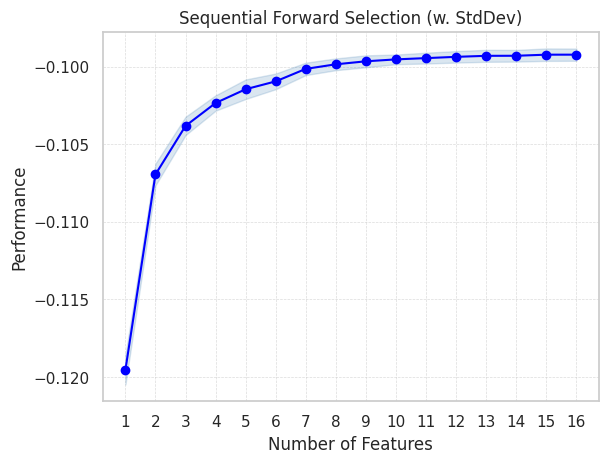

<Figure size 640x480 with 0 Axes>

In [18]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

plt.savefig(f"{FS_ASSETS_DIR}/sfs.png") 

In [19]:
sbs_df

feature_idx   
20  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  \
19  (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14...   
18  (0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
17  (0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, ...   
16  (2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...   

                                            cv_scores avg_score   
20  [-0.09905409416953657, -0.09978135354600902, -... -0.099233  \
19  [-0.09905370401942276, -0.09977971857016453, -... -0.099232   
18  [-0.09905370401942275, -0.09977971857016453, -... -0.099232   
17  [-0.09905370401942276, -0.09977971857016453, -... -0.099232   
16  [-0.09905022428677743, -0.09977848937151167, -... -0.099231   

                                        feature_names  ci_bound   std_dev   
20  (binary__has_elevator_True, binary__is_apartme...   0.00089  0.000395  \
19  (binary__has_elevator_True, binary__is_apartme...   0.00089  0.000395   
18  (binary__has_elevator_True, cat__building_type...   0.00089  0.000395   
17  (binary__has_elevator_True, cat__building_type...   0.00089  0.000395   
16  (cat__building_type_int, num__build_year, num_...  0.000888  0.000395   

     std_err  
20   0.00028  
19   0.00028  
18   0.00028  
17   0.00028  
16  0.000279

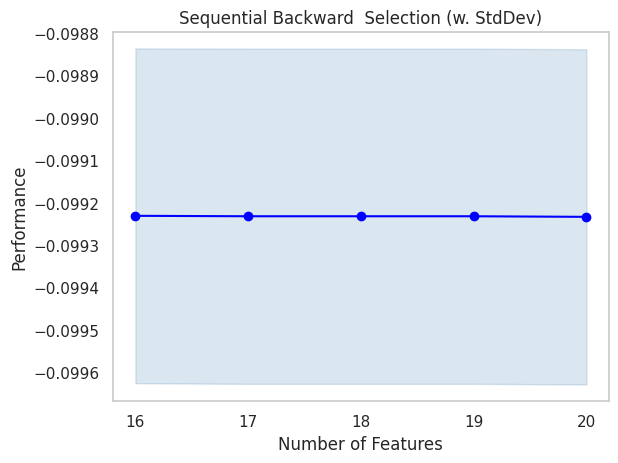

<Figure size 640x480 with 0 Axes>

In [20]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_dev')

plt.title('Sequential Backward  Selection (w. StdDev)')
plt.grid()
plt.show()

plt.savefig(f"{FS_ASSETS_DIR}/sbs.png") 

In [18]:
# Объединение индексов выбранных признаков из SFS и SBS для обучения
selected_features = sorted(list(set(selected_features_sfs + selected_features_sbs)))

# Названия отобранных признаков
selected_features_name = X_train_tr.columns[selected_features]
selected_features_name

Index(['cat__building_type_int', 'num__build_year', 'num__latitude',
       'num__longitude', 'num__ceiling_height', 'num__floors_total',
       'num__floor', 'num__kitchen_area', 'num__living_area',
       'num__is_apartment', 'num__total_area', 'num__total_rooms_ratio',
       'num__distance_to_center', 'num__ratio_living_area',
       'num__ratio_kitchen_area', 'num__mean_flats_area'],
      dtype='object')

In [19]:
# Сохраним список фич
import pickle

# Сохраняем в файл
with open(f'{FS_ASSETS_DIR}/selected_features_name.pkl', 'wb') as file:
    pickle.dump(selected_features_name, file)

#### 4.4 Обучение новой версии модели

In [59]:
model_sf = CatBoostRegressor(
    loss_function='RMSE', 
    random_seed=SEED,
    verbose=100)

# Кастомные метрики для кросс-валидации
def expm1_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

def expm1_mae(y_true, y_pred):
    return mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))

scoring = {
    'rmse': make_scorer(expm1_rmse),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(expm1_mae)
}

# Кросс-валидация
cv_results = cross_validate(
    model_sf,
    X_train_tr[selected_features_name],
    y_train,
    cv=4,
    n_jobs=-1,
    scoring=scoring
)

# Усреднение результатов кросс-валидации
final_metrics = {
    'test_rmse': round(np.mean(cv_results['test_rmse']), 3),
    'test_r2': round(np.mean(cv_results['test_r2']), 3),
    'test_mae': round(np.mean(cv_results['test_mae']), 3)
}

print("\nCross-validation results:")
print(f"Fit time (avg): {np.mean(cv_results['fit_time']):.3f} ± {np.std(cv_results['fit_time']):.3f} sec")
print(f"Score time (avg): {np.mean(cv_results['score_time']):.3f} ± {np.std(cv_results['score_time']):.3f} sec")

for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

Learning rate set to 0.078804
Learning rate set to 0.078804
0:	learn: 0.4134313	total: 23.5ms	remaining: 23.5s
0:	learn: 0.4111463	total: 22.5ms	remaining: 22.4s
100:	learn: 0.2921212	total: 2.46s	remaining: 21.9s
100:	learn: 0.2949226	total: 2.56s	remaining: 22.8s
200:	learn: 0.2829565	total: 5.1s	remaining: 20.3s
200:	learn: 0.2852684	total: 5.17s	remaining: 20.6s
300:	learn: 0.2756130	total: 7.8s	remaining: 18.1s
300:	learn: 0.2777485	total: 7.88s	remaining: 18.3s
400:	learn: 0.2691302	total: 10.3s	remaining: 15.4s
400:	learn: 0.2715955	total: 10.5s	remaining: 15.6s
500:	learn: 0.2638254	total: 13s	remaining: 12.9s
500:	learn: 0.2666315	total: 13.2s	remaining: 13.2s
600:	learn: 0.2591173	total: 15.7s	remaining: 10.4s
600:	learn: 0.2622284	total: 15.9s	remaining: 10.6s
700:	learn: 0.2554546	total: 18.4s	remaining: 7.85s
700:	learn: 0.2584095	total: 18.7s	remaining: 7.99s
800:	learn: 0.2510674	total: 20.9s	remaining: 5.19s
800:	learn: 0.2539494	total: 21.1s	remaining: 5.23s
900:	learn

In [20]:
X_train_fs = X_train_tr[selected_features_name]
X_test_fs = X_test_tr[selected_features_name]

In [67]:
model_sf.fit(X_train_fs,y_train)

Learning rate set to 0.082469
0:	learn: 0.4116156	total: 17.5ms	remaining: 17.5s
100:	learn: 0.2949765	total: 1.42s	remaining: 12.7s
200:	learn: 0.2861923	total: 2.74s	remaining: 10.9s
300:	learn: 0.2795551	total: 4.08s	remaining: 9.47s
400:	learn: 0.2741371	total: 5.64s	remaining: 8.43s
500:	learn: 0.2690924	total: 7.36s	remaining: 7.33s
600:	learn: 0.2650619	total: 8.72s	remaining: 5.79s
700:	learn: 0.2611694	total: 10.1s	remaining: 4.3s
800:	learn: 0.2576589	total: 11.5s	remaining: 2.85s
900:	learn: 0.2541189	total: 12.9s	remaining: 1.42s
999:	learn: 0.2512107	total: 14.3s	remaining: 0us


In [ ]:
# Предсказание на тестовых данных (с преобразованием обратно в исходную шкалу)
test_pred = np.expm1(model_sf.predict(X_test_fs))
test_true = np.expm1(y_test)

# Расчет финальных метрик
metrics = {
    'r2_score': round(r2_score(test_true, test_pred), 3),
    'rmse': round(np.sqrt(mean_squared_error(test_true, test_pred)), 3),
    'mae': round(mean_absolute_error(test_true, test_pred), 3),
    'mape': round(mean_absolute_percentage_error(test_true, test_pred),3)
}

for metric, value in metrics.items():
    print(f"{metric}: {value}")

r2_score: 0.703
rmse: 2455029.815
mae: 1871518.024
mape: 1.417


Все метрики улучшились.

#### 4.5 Логирование всех артефактов в MLflow

In [ ]:
import os
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "ozerge_PROJECT_SPRINT_2"
# Логируем в новый ран с новым названием feature_selection
RUN_NAME = "feature_selection"

# Название модели project_model_generated_features
REGISTRY_MODEL_NAME = "project_2_model_feature_selection"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

input_example =  X_train_tr[selected_features_name][:10]
prediction = model_sf.predict(input_example[:10])
signature = mlflow.models.infer_signature(input_example, prediction)


experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.set_tags({
        "model_type": "CatBoostRegressor",
        "data_version": "2024-07-18",
        "feature_selection": "v8"})
    
    notebook_path = "../model_improvement/project_template_sprint_2.ipynb"
    mlflow.log_artifact(notebook_path)

    mlflow.log_artifacts(FS_ASSETS_DIR)

    mlflow.log_metrics(metrics)
    
    model_info = mlflow.sklearn.log_model(
        sk_model=model_sf, 
        artifact_path="models",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)

2025-07-19 03:07:54,212 INFO: Found credentials in environment variables.
Successfully registered model 'project_2_model_feature_selection'.
2025/07/19 03:07:57 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: project_2_model_feature_selection, version 1
Created version '1' of model 'project_2_model_feature_selection'.


In [64]:
run = mlflow.get_run(run_id)

print("EXPERIMENT_NAME: ", EXPERIMENT_NAME)
print("experiment_id: ", experiment_id)
print("run_id: ", run_id)

EXPERIMENT_NAME:  ozerge_PROJECT_SPRINT_2
experiment_id:  31
run_id:  aff45617a5e547178d7fefe9299a7438


### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

#### 5.1 Подбор гиперпарметров при мощи метода номер 1

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [22]:
# Подбор гиперпараметров с помощью RandomizedSearchCV:

# Определяем пространство гиперпараметров
param_dist = {
    'l2_leaf_reg': [3, 5, 7],  # Новый параметр
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [500, 1000, 1500],
    'depth': [4, 6, 8]
}

# Инициализация модели
model_rs = CatBoostRegressor(loss_function='RMSE', random_state=SEED)

# Настройка RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=model_rs,
    param_distributions=param_dist,
    n_iter=20,  # Количество комбинаций для проверки
    scoring='neg_root_mean_squared_error',  # Метрика для оптимизации
    cv=3,  # Количество фолдов кросс-валидации
    n_jobs=-1,  # Использовать все ядра процессора
    random_state=SEED,
    verbose=2
)

# Запуск поиска
start_time = time.time()

rs.fit(X_train_fs, y_train)

end_time = time.time()
total_seconds = end_time - start_time
minutes = int(total_seconds // 60)
seconds = int(total_seconds % 60)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
0:	learn: 0.4236070	total: 91.7ms	remaining: 45.8s
0:	learn: 0.4238168	total: 91.6ms	remaining: 45.7s
1:	learn: 0.4219768	total: 116ms	remaining: 28.9s
1:	learn: 0.4221758	total: 122ms	remaining: 30.3s
2:	learn: 0.4204099	total: 141ms	remaining: 23.4s
2:	learn: 0.4205959	total: 151ms	remaining: 25s
3:	learn: 0.4188859	total: 169ms	remaining: 20.9s
3:	learn: 0.4190499	total: 176ms	remaining: 21.9s
4:	learn: 0.4173304	total: 196ms	remaining: 19.4s
4:	learn: 0.4174737	total: 211ms	remaining: 20.9s
5:	learn: 0.4157783	total: 221ms	remaining: 18.2s
5:	learn: 0.4159018	total: 238ms	remaining: 19.6s
6:	learn: 0.4142608	total: 247ms	remaining: 17.4s
6:	learn: 0.4143581	total: 264ms	remaining: 18.6s
7:	learn: 0.4127097	total: 272ms	remaining: 16.7s
8:	learn: 0.4112059	total: 297ms	remaining: 16.2s
7:	learn: 0.4128729	total: 294ms	remaining: 18.1s
9:	learn: 0.4097619	total: 324ms	remaining: 15.9s
8:	learn: 0.4113398	total: 321ms	remain

In [23]:
# Вывод результатов

print(f"Общее время выполнения: {minutes} мин {seconds} сек")
print("Лучшие параметры:", rs.best_params_)
print("Лучший RMSE:", -rs.best_score_)

Общее время выполнения: 13 мин 3 сек
Лучшие параметры: {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 1500, 'depth': 8}
Лучший RMSE: 0.295826996767576


In [25]:
best_params_rs = rs.best_params_
best_score_rs = -rs.best_score_
total_seconds_rs = total_seconds

#### 5.2 Подбор гиперпарметров при мощи метода номер 2

In [26]:
from optuna.integration.mlflow import MLflowCallback
import optuna
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import KFold
from collections import defaultdict

In [27]:
# Подбор гиперпараметров с помощью Bayesian Search

import time

def format_time(seconds):
    """Форматирует время в минутах и секундах (например, '5m 30s')"""
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    return f"{minutes}m {seconds}s"

def objective(trial: optuna.Trial) -> float:
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
        "depth": trial.suggest_int("depth", 4, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.1, 7),
        "iterations": trial.suggest_int("iterations", 500, 1500),
        "loss_function": "RMSE",
        "task_type": "CPU",
        "random_seed": SEED,
        "verbose": False,
    }

    model = CatBoostRegressor(**param)
    kf = KFold(n_splits=2, shuffle=True, random_state=SEED)
    rmse_scores = []
    
    for train_index, val_index in kf.split(X_train_fs):
        train_x = X_train_fs.iloc[train_index]
        val_x = X_train_fs.iloc[val_index]
        train_y = y_train.iloc[train_index]
        val_y = y_train.iloc[val_index]

        model.fit(
            train_x, 
            train_y,
            eval_set=(val_x, val_y),
            early_stopping_rounds=50,
            verbose=False
        )
        prediction = model.predict(val_x)
        rmse = -np.sqrt(mean_squared_error(val_y, prediction))
        rmse_scores.append(rmse)

    return np.mean(rmse_scores)

# Конфигурация study
STUDY_DB_NAME = "sqlite:///local.study.db"
STUDY_NAME = "optuna_bayesian_optimization"

# Удаляем предыдущее study, если оно существует
try:
    optuna.delete_study(study_name=STUDY_NAME, storage=STUDY_DB_NAME)
except:
    pass  # Игнорируем ошибку, если study не существует

# Создаем новое study
study = optuna.create_study(
    direction="minimize",
    study_name=STUDY_NAME,
    storage=STUDY_DB_NAME,
    sampler=optuna.samplers.TPESampler(seed=SEED)
)

# Запуск оптимизации с замером времени
start_time = time.time()

try:
    study.optimize(objective, n_trials=20, show_progress_bar=True)
    elapsed_time = time.time() - start_time
    
    print("\nOptimization completed successfully!")
    print(f"Время выполнения: {format_time(elapsed_time)}")
    print("Лучшие параметры:", study.best_params)
    print("Лучший RMSE:", study.best_value)
    
except Exception as e:
    elapsed_time = time.time() - start_time
    print(f"\nOptimization failed: {e}")
    print(f"Время выполнения: {format_time(elapsed_time)}")
    
    # Проверяем, есть ли выполненные trials
    if len(study.trials) > 0:
        print("Лучшие параметры:", study.best_params)
        print("Лучший RMSE:", -study.best_value)
    else:
        print("No trials were completed successfully.")

[I 2025-07-20 03:50:43,415] A new study created in RDB with name: optuna_bayesian_optimization


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-07-20 03:51:17,965] Trial 0 finished with value: -0.30144119592318985 and parameters: {'learning_rate': 0.005611516415334507, 'depth': 8, 'l2_leaf_reg': 5.150758198498695, 'iterations': 1099}. Best is trial 0 with value: -0.30144119592318985.
[I 2025-07-20 03:51:35,983] Trial 1 finished with value: -0.3160896454517388 and parameters: {'learning_rate': 0.0020513382630874496, 'depth': 4, 'l2_leaf_reg': 0.5007769239605763, 'iterations': 1367}. Best is trial 1 with value: -0.3160896454517388.
[I 2025-07-20 03:52:04,147] Trial 2 finished with value: -0.2975417505363843 and parameters: {'learning_rate': 0.015930522616241012, 'depth': 7, 'l2_leaf_reg': 0.24203301064103688, 'iterations': 1470}. Best is trial 1 with value: -0.3160896454517388.
[I 2025-07-20 03:52:14,096] Trial 3 finished with value: -0.2987392513501915 and parameters: {'learning_rate': 0.04622589001020832, 'depth': 5, 'l2_leaf_reg': 1.3545922737289944, 'iterations': 683}. Best is trial 1 with value: -0.3160896454517388.

In [29]:
best_params_opt_bs = study.best_params
best_score_opt_bs = -study.best_value
total_seconds_opt_bs = elapsed_time

#### 5.3 Формирование списка гиперпараметров для новой модели

In [54]:
# Определяем стандартный порядок параметров (можно изменить по вашему желанию)
PARAM_ORDER = ['learning_rate', 'depth', 'l2_leaf_reg', 'iterations']

# Модифицированная функция для форматирования параметров с сортировкой
def format_params(params):
    # Сортируем параметры согласно заданному порядку
    sorted_params = sorted(params.items(), 
                         key=lambda x: PARAM_ORDER.index(x[0]) if x[0] in PARAM_ORDER else len(PARAM_ORDER))
    return "\n".join([f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}" 
                     for k, v in sorted_params])

results_compare = pd.DataFrame({
    'Method': ['Bayesian Optimization', 'Random Search'],
    'Best RMSE': [best_score_opt_bs, best_score_rs],
    'Time': [
        f"{int(total_seconds_opt_bs // 60)}m {int(total_seconds_opt_bs % 60)}s",
        f"{int(total_seconds_rs // 60)}m {int(total_seconds_rs % 60)}s"
    ],
    'Parameters': [
        format_params(best_params_opt_bs),
        format_params(best_params_rs)
    ],
    #'Seconds': [total_seconds_opt_bs, total_seconds_rs]
})

results_compare = results_compare.sort_values('Best RMSE').reset_index(drop=True)

# Красивое отображение результатов
def display_results(df):
    from IPython.display import display
    display(df[['Method', 'Best RMSE', 'Time', 'Parameters']]
            .style
            .set_properties(**{'text-align': 'left', 'white-space': 'pre-wrap'})
            .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
            .format({'Best RMSE': '{:.5f}'}))

In [55]:
display_results(results_compare)

print(f"\nBayesian Optimization быстрее Random Search в {total_seconds_rs/total_seconds_opt_bs:.1f}x")
print(f"Улучшение RMSE: {(best_score_rs - best_score_opt_bs)/best_score_rs*100:.1f}%")


Bayesian Optimization быстрее Random Search в 1.6x
Улучшение RMSE: -11.9%


In [56]:
best_params_final = best_params_rs

In [ ]:
markdown_content = """ Ключевые выводы подбора гиперпараметров  

Random Search vs Bayesian Optimization  

Подбор гиперпараметров смог улучшить итоговое качество.    

- Random Search показал лучший результат (0.295827) по сравнению с Bayesian Optimization (0.331021).   
- Bayesian Optimization работал быстрее (8 минут против 13 минут). Random Search потребовал на ~60% больше времени.  
- Random Search показал лучшее качество модели, несмотря на большее время выполнения. Если время не критично - выбираем его. Если важно быстро получить хороший результат - Bayesian Optimization.  
- Оба метода нашли разные оптимальные параметры.  
- Random Search выбрал более высокую learning_rate (0.05 vs 0.001) и больше iterations (1500 vs 1205).  
- Выбираем Random Search, так как он дал лучший RMSE. Разница в качестве существенна (~11.9% улучшения).  

Итоговые параметры:  
'learning_rate': 0.05,  
'depth': 8,  
'l2_leaf_reg': 3,  
'iterations': 1500  
"""
markdown_file = f"{HYP_ASSETS_DIR}/summary.md"
with open(markdown_file, "w") as f:
    f.write(markdown_content)

with open(f'{HYP_ASSETS_DIR}/best_params_final.json', 'w', encoding='utf-8') as f:
    json.dump(best_params_final, f, ensure_ascii=False, indent=4)

results_compare.to_csv(f"{HYP_ASSETS_DIR}/results.csv", index=False, encoding="utf-8-sig", float_format="%.5f", sep=",")

#### 5.4 Обуение финальной версии модели

In [64]:
model_final = CatBoostRegressor(
    **best_params_final,
    loss_function='RMSE', 
    random_seed=SEED,
    verbose=100)

# Кастомные метрики для кросс-валидации
def expm1_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_true), np.expm1(y_pred)))

def expm1_mae(y_true, y_pred):
    return mean_absolute_error(np.expm1(y_true), np.expm1(y_pred))

scoring = {
    'rmse': make_scorer(expm1_rmse),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(expm1_mae)
}

# Кросс-валидация
cv_results = cross_validate(
    model_sf,
    X_train_fs,
    y_train,
    cv=4,
    n_jobs=-1,
    scoring=scoring
)

# Усреднение результатов кросс-валидации
final_metrics = {
    'test_rmse': round(np.mean(cv_results['test_rmse']), 3),
    'test_r2': round(np.mean(cv_results['test_r2']), 3),
    'test_mae': round(np.mean(cv_results['test_mae']), 3)
}

print("\nCross-validation results:")
print(f"Fit time (avg): {np.mean(cv_results['fit_time']):.3f} ± {np.std(cv_results['fit_time']):.3f} sec")
print(f"Score time (avg): {np.mean(cv_results['score_time']):.3f} ± {np.std(cv_results['score_time']):.3f} sec")

for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

0:	learn: 0.4177238	total: 122ms	remaining: 3m 2s
0:	learn: 0.4154682	total: 65.8ms	remaining: 1m 38s
100:	learn: 0.2952579	total: 4.63s	remaining: 1m 4s
100:	learn: 0.2915534	total: 4.56s	remaining: 1m 3s
200:	learn: 0.2845060	total: 9.04s	remaining: 58.4s
200:	learn: 0.2821146	total: 8.96s	remaining: 57.9s
300:	learn: 0.2777588	total: 13.7s	remaining: 54.4s
300:	learn: 0.2756094	total: 13.5s	remaining: 53.6s
400:	learn: 0.2718421	total: 18.2s	remaining: 50s
400:	learn: 0.2700548	total: 18s	remaining: 49.3s
500:	learn: 0.2643229	total: 22.4s	remaining: 44.6s
500:	learn: 0.2662757	total: 22.9s	remaining: 45.7s
600:	learn: 0.2611317	total: 27.3s	remaining: 40.9s
600:	learn: 0.2594488	total: 26.9s	remaining: 40.2s
700:	learn: 0.2565762	total: 32.4s	remaining: 36.9s
700:	learn: 0.2541469	total: 32s	remaining: 36.5s
800:	learn: 0.2520577	total: 37.5s	remaining: 32.7s
800:	learn: 0.2492926	total: 37s	remaining: 32.3s
900:	learn: 0.2475332	total: 41.9s	remaining: 27.9s
900:	learn: 0.2446993	

In [65]:
model_final.fit(X_train_fs,y_train)

0:	learn: 0.4165127	total: 24.7ms	remaining: 37s
100:	learn: 0.2946863	total: 2.24s	remaining: 31s
200:	learn: 0.2855870	total: 4.32s	remaining: 27.9s
300:	learn: 0.2792462	total: 6.37s	remaining: 25.4s
400:	learn: 0.2730685	total: 8.51s	remaining: 23.3s
500:	learn: 0.2682464	total: 10.6s	remaining: 21.2s
600:	learn: 0.2633954	total: 12.7s	remaining: 19s
700:	learn: 0.2593203	total: 14.8s	remaining: 16.9s
800:	learn: 0.2556829	total: 16.9s	remaining: 14.8s
900:	learn: 0.2518866	total: 19.1s	remaining: 12.7s
1000:	learn: 0.2483216	total: 21.3s	remaining: 10.6s
1100:	learn: 0.2448599	total: 23.4s	remaining: 8.49s
1200:	learn: 0.2415928	total: 25.6s	remaining: 6.37s
1300:	learn: 0.2386268	total: 27.7s	remaining: 4.24s
1400:	learn: 0.2357505	total: 29.9s	remaining: 2.11s
1499:	learn: 0.2326819	total: 32.1s	remaining: 0us


In [67]:
# Предсказание на тестовых данных (с преобразованием обратно в исходную шкалу)
test_pred = np.expm1(model_final.predict(X_test_fs))
test_true = np.expm1(y_test)

# Расчет финальных метрик
metrics_final = {
    'r2_score': round(r2_score(test_true, test_pred), 3),
    'rmse': round(np.sqrt(mean_squared_error(test_true, test_pred)), 3),
    'mae': round(mean_absolute_error(test_true, test_pred), 3),
    'mape': round(mean_absolute_percentage_error(test_true, test_pred),3)
}

for metric, value in metrics_final.items():
    print(f"{metric}: {value}")

r2_score: 0.707
rmse: 2434893.673
mae: 1857911.114
mape: 1.382


#### 5.5 Логирование артефактов в MLflow

In [70]:
import os
import mlflow
from dotenv import load_dotenv

load_dotenv()

TRACKING_SERVER_HOST = "127.0.0.1"
TRACKING_SERVER_PORT = 5000
EXPERIMENT_NAME = "ozerge_PROJECT_SPRINT_2"
# Логируем в новый ран с новым названием hyper_params_serching
RUN_NAME = "hyper_params_serching"

# Название модели project_model_generated_features
REGISTRY_MODEL_NAME = "project_2_model_hyper_params_serching"

os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://storage.yandexcloud.net" #endpoint бакета от YandexCloud
os.environ["AWS_ACCESS_KEY_ID"] = os.getenv("AWS_ACCESS_KEY_ID") # получаем id ключа бакета, к которому подключён MLFlow, из .env
os.environ["AWS_SECRET_ACCESS_KEY"] = os.getenv("AWS_SECRET_ACCESS_KEY") # получаем ключ бакета, к которому подключён MLFlow, из .env

mlflow.set_tracking_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")
mlflow.set_registry_uri(f"http://{TRACKING_SERVER_HOST}:{TRACKING_SERVER_PORT}")

input_example =  X_train_fs[:10]
prediction = model_final.predict(input_example[:10])
signature = mlflow.models.infer_signature(input_example, prediction)


experiment = mlflow.get_experiment_by_name(EXPERIMENT_NAME)
if not experiment:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
else:
    experiment_id = experiment.experiment_id

with mlflow.start_run(run_name=RUN_NAME, experiment_id=experiment_id) as run:
    run_id = run.info.run_id

    mlflow.set_tags({
        "model_type": "CatBoostRegressor",
        "data_version": "2024-07-20",
        "hyper_params_serching": "v9"})
    
    notebook_path = "../model_improvement/project_template_sprint_2.ipynb"
    mlflow.log_artifact(notebook_path)

    mlflow.log_artifacts(HYP_ASSETS_DIR)

    mlflow.log_metrics(metrics_final)
    
    model_info = mlflow.sklearn.log_model(
        sk_model=model_sf, 
        artifact_path="models",
        registered_model_name=REGISTRY_MODEL_NAME,
        signature=signature,
        input_example=input_example,
        await_registration_for=60
		)

Registered model 'project_2_model_hyper_params_serching' already exists. Creating a new version of this model...
2025/07/20 06:09:23 INFO mlflow.tracking._model_registry.client: Waiting up to 60 seconds for model version to finish creation. Model name: project_2_model_hyper_params_serching, version 2
Created version '2' of model 'project_2_model_hyper_params_serching'.


In [71]:
run = mlflow.get_run(run_id)

print("EXPERIMENT_NAME: ", EXPERIMENT_NAME)
print("experiment_id: ", experiment_id)
print("run_id: ", run_id)

EXPERIMENT_NAME:  ozerge_PROJECT_SPRINT_2
experiment_id:  31
run_id:  87b902d9d99243329868e4ffd9e1015d


***Итоговый вывод:***  

- Все метрики улучшились.
- Дальнейшее улучшение возможно на стадии предобработки данных.
- Добавить новые признаки на основе расстояния от центра, которые поделят недвижимость на элитную и спальных районов. Разделить на категории:  
    - внутри Садового кольца
    - от Садового кольца до Третьего транспортного кольца
    - от ТТК до МКАД.
    - от МКАД - за МКАД
- Дальнейшее возможное улучшение - деление по районам.
- Данные улучшения повысят предсказательную способность модели для разной ценовой категории недвижимости.